In [64]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [85]:
# Read data and split into different variables
filename = 'dataLeaderFollower_2019-03-17_22-20-02.csv'
data = np.genfromtxt(filename, dtype=float, delimiter=',')
curr_time = data[:, 0]
pos1 = data[:, 1:4] #3 columns
pos2 = data[:, 4:7] #3 columns
pos3 = data[:, 7:10] #3 columns
followPosErrorNorm = data[:, 10] #1 column
vec1Norm = data[:, 11] #1 column
vec2Norm = data[:, 12] #1 column
weight1 = data[:, 13] #1 column
weight2 = data[:, 14] #1 column
numCollisions = data[:, 15] #1 column
lastCollisionPoint = data[:, 16:] #last 3 columns

Plot end-effector positions over time

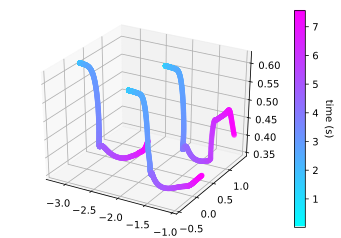

In [143]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pos1[:,0], pos1[:,1], pos1[:,2], c=curr_time, cmap='cool')
ax.scatter(pos2[:,0], pos2[:,1], pos2[:,2], c=curr_time, cmap='cool')
sc = ax.scatter(pos3[:,0], pos3[:,1], pos3[:,2], c=curr_time, cmap='cool')

cbar = plt.colorbar(sc)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('time (s)', rotation=270)

plt.show()

Plot follower position and obstacles over time

In [129]:
radius = 0.15

# data for drawing spheres
u, v = np.mgrid[0:2*np.pi:10j, 0:np.pi:10j]
x = radius * np.cos(u)*np.sin(v)
y = radius * np.sin(u)*np.sin(v)
z = radius * np.cos(v)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pos3[:,0], pos3[:,1], pos3[:,2], c=curr_time, cmap='cool')
# ax.plot_wireframe(x, y, z, color='r')
# ax.set_aspect('equal', 'box')
ax.axis('equal')

# draw collision spheres
prevNumCollisions = numCollisions[0]
for i in range(len(data)):
    if numCollisions[i] != prevNumCollisions:
        ax.plot_wireframe(lastCollisionPoint[i,0]+x, lastCollisionPoint[i,1]+y, lastCollisionPoint[i,2]+z, color='r')
        
plt.show()

Plot norm of guidance vectors over time

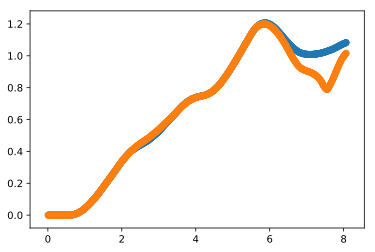

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(curr_time, vec1Norm)
ax.scatter(curr_time, vec2Norm)

plt.show()

Plot guidance weights over time

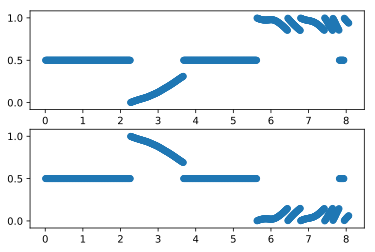

In [70]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.scatter(curr_time, weight1)
ax2.scatter(curr_time, weight2)

plt.show()

Plot follower position error over time

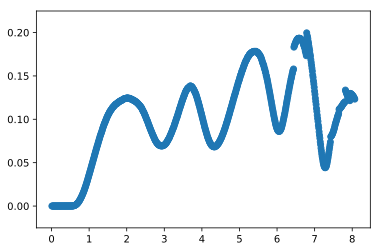

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(curr_time, followPosErrorNorm)

plt.show()

In [ ]:
#Plot raw sensed forces
labels = ('$F_x$', '$F_y$', '$F_z$')

fig = plt.figure(figsize=(5, 5*2/3))
ax = fig.add_subplot(111)

for i in range(3):
    plt.plot(curr_time[::plotEvery], sensed_force[::plotEvery, i], label=labels[i])
#     plt.plot(curr_time[::plotEvery], sensed_force[::plotEvery, i], '-', label=labels[i])

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Surface alignment forces (pos_in_link_z = 0.2)')
plt.ylabel('Force (N)')
plt.xlabel('Time (s)')
plt.xlim(0, curr_time[-1])

#Save plot! :) 
# plt.savefig('Plots/' + filename + '_rawFs.png', dpi=300)

plt.show()